In [17]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [18]:
# Leer el archivo CSV
file_path = 'C:/Users/carlo/beisbol.csv'
data = pd.read_csv(file_path)

In [19]:
# Verificar la estructura de los datos
print(data.head())

   Unnamed: 0  equipos  bateos  runs
0           0    Texas    5659   855
1           1   Boston    5710   875
2           2  Detroit    5563   787
3           3   Kansas    5672   730
4           4      St.    5532   762


In [20]:
# Preparar los datos para la regresión
X = data[['bateos']]  # Característica predictiva
y = data['runs']  # Variable de respuesta

In [21]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Crear el modelo de regresión lineal
model = LinearRegression()

In [23]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Realizar predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

In [25]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R^2): {r2}')

Error Cuadrático Medio (MSE): 5219.975632116472
Coeficiente de Determinación (R^2): -0.5174837911123824


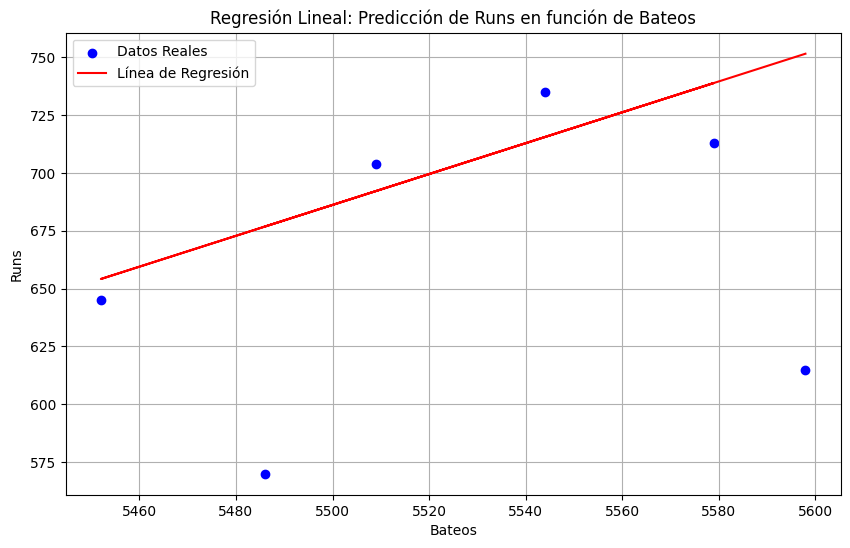

In [27]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Predicción de Runs en función de Bateos')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Definir la evaluación
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [29]:
# Definir el espacio de búsqueda de hiperparámetros
space = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'positive': [True, False]
}

In [30]:
# Crear la búsqueda de hiperparámetros
search = GridSearchCV(estimator=LinearRegression(), param_grid=space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

In [31]:
# Ejecutar la búsqueda de hiperparámetros
search.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_absolute_error')

In [32]:
# Imprimir los mejores hiperparámetros y su puntuación
print('Mejor puntuación: %s' % search.best_score_)
print('Mejores hiperparámetros: %s' % search.best_params_)

Mejor puntuación: -58.57410638814197
Mejores hiperparámetros: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [33]:
# Optimizando el modelo con los mejores hiperparámetros
model_optimized = LinearRegression(**search.best_params_)

In [34]:
# Re-entrenar el modelo optimizado
model_optimized.fit(X_train, y_train)

LinearRegression()

In [35]:
# Realizar predicciones con el conjunto de prueba usando el modelo optimizado
y_pred_optimized = model_optimized.predict(X_test)

In [36]:
# Evaluar el modelo optimizado
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

In [37]:
print(f'Error Cuadrático Medio Optimizado (MSE): {mse_optimized}')
print(f'Coeficiente de Determinación Optimizado (R^2): {r2_optimized}')

Error Cuadrático Medio Optimizado (MSE): 5219.975632116472
Coeficiente de Determinación Optimizado (R^2): -0.5174837911123824


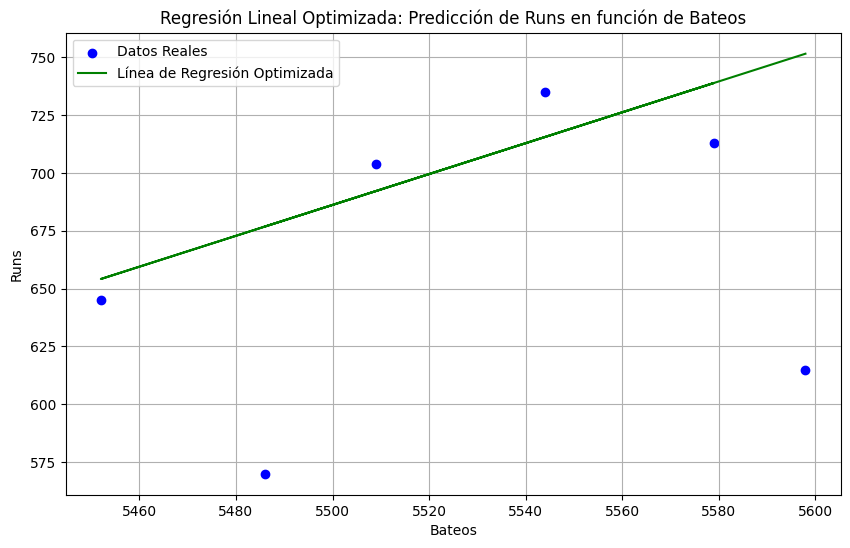

In [38]:
# Graficar los resultados optimizados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred_optimized, color='green', label='Línea de Regresión Optimizada')
plt.title('Regresión Lineal Optimizada: Predicción de Runs en función de Bateos')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.legend()
plt.grid(True)
plt.show()